### Q1: Find the division/district/year/month wise total_sale_price joining fact table and respective dimension table 

### Import Libraries

In [ ]:
import psycopg2
import pandas as pd
import numpy as np
import psycopg2.extras
import matplotlib.pyplot as plt

### Database Connection

In [41]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database = "ecomdb",
                                                  user = "postgres",
                                                  password = "sultanmahmud22",
                                                  host = "127.0.0.1",
                                                  port= "5432")
    def getConnection(self):
        print("Successfully connected to the database")
        return self.connection

con = PostgresConnection().getConnection()

Successfully connected to the database


### Data Extraction by using SQL Queries

### Basic Queries

#### 1. SELECT s.division,s.district, tim.year, tim.month, SUM(t.total_price)
#### FROM star_schema.fact_table t 
#### JOIN star_schema.store_dim s on s.store_key = t.store_key
#### JOIN star_schema.time_dim tim on tim.time_key = t.time_key 
#### GROUP BY s.division, s.district, tim.year, tim.month
#### ORDER BY tim.year

In [16]:
con = PostgresConnection().getConnection()

cur = con.cursor()
select_stmt = "SELECT s.division, tim.year, SUM(t.total_price) " \
"FROM star_schema.fact_table t  " \
"JOIN star_schema.store_dim s on s.store_key = t.store_key " \
"JOIN star_schema.time_dim tim on tim.time_key = t.time_key " \
"WHERE s.district = 'DHAKA'" \
"GROUP BY CUBE(s.division, tim.year) "\
"ORDER BY tim.year "
cur.execute(select_stmt)
records = cur.fetchall()
records

[('DHAKA', 2014, Decimal('3241972.75')),
 (None, 2014, Decimal('3241972.75')),
 (None, 2015, Decimal('3399121.50')),
 ('DHAKA', 2015, Decimal('3399121.50')),
 (None, 2016, Decimal('3346624.75')),
 ('DHAKA', 2016, Decimal('3346624.75')),
 ('DHAKA', 2017, Decimal('3330990.75')),
 (None, 2017, Decimal('3330990.75')),
 (None, 2018, Decimal('3409901.00')),
 ('DHAKA', 2018, Decimal('3409901.00')),
 ('DHAKA', 2019, Decimal('3317606.00')),
 (None, 2019, Decimal('3317606.00')),
 (None, 2020, Decimal('3357468.25')),
 ('DHAKA', 2020, Decimal('3357468.25')),
 ('DHAKA', 2021, Decimal('193936.00')),
 (None, 2021, Decimal('193936.00')),
 ('DHAKA', None, Decimal('23597621.00')),
 (None, None, Decimal('23597621.00'))]

In [17]:
df = pd.DataFrame(list(records), columns = ['Division','Year', 'Sales'])
df = df.dropna()
df

,Division,Year,Sales
0,DHAKA,2014.0,3241972.75
3,DHAKA,2015.0,3399121.50
5,DHAKA,2016.0,3346624.75
6,DHAKA,2017.0,3330990.75
9,DHAKA,2018.0,3409901.00
10,DHAKA,2019.0,3317606.00
13,DHAKA,2020.0,3357468.25
14,DHAKA,2021.0,193936.00


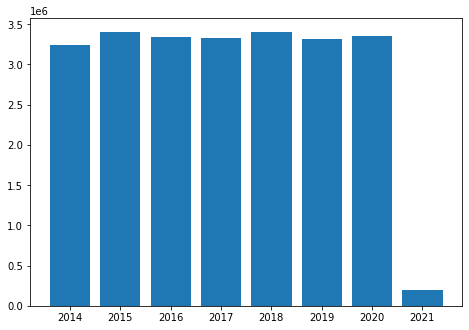

In [5]:
X = df.iloc[:, -2].values
Y = df.iloc[:, 2].values
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X,Y)
plt.show()

In [32]:
df['Year'] = df['Year'].astype('int64')
df['Sales'] = df['Sales'].astype('float64')
df.dtypes

Division     object
Year          int64
Sales       float64
dtype: object

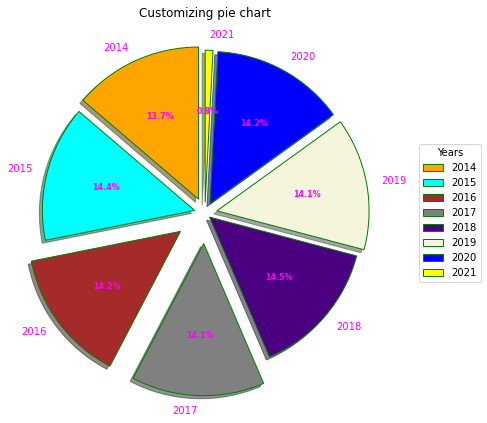

In [8]:
x=df.Year
y = df.Sales
# Creating explode data
explode = (0.1, 0.07, 0.2, 0.2, 0.04, 0.08, 0.07, 0.07)

# Creating color parameters
colors = ( "orange", "cyan", "brown","grey", "indigo", "beige", "blue", "yellow")

# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%".format(pct, absolute)

# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(y,
                                  autopct = lambda pct: func(pct, y),
                                  explode = explode,
                                  labels = x,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="magenta"))
 
# Adding legend
ax.legend(wedges, x,
          title ="Years",
          loc ="center left",
          bbox_to_anchor =(1.05, 0, 0.8, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Customizing pie chart")

# show plot
plt.show()

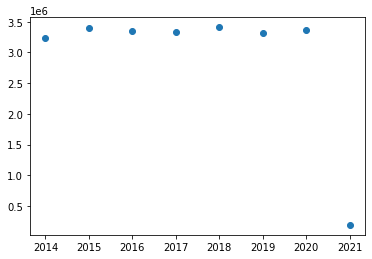

In [9]:
plt.scatter(x, y)

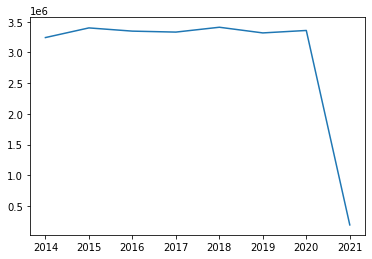

In [10]:
plt.plot(x, y) # Plot the chart
plt.show() # display


In [33]:
x = df.iloc[:, 1].values
y=df.iloc[:, -1].values
y
#x.reshape(1, -1)
np.array(x)[:, None]



array([[2014],
       [2015],
       [2016],
       [2017],
       [2018],
       [2019],
       [2020],
       [2021]], dtype=int64)

In [35]:
y

array([3241972.75, 3399121.5 , 3346624.75, 3330990.75, 3409901.  ,
       3317606.  , 3357468.25,  193936.  ])

In [37]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state = 0)


# regressor = LinearRegression()
# regressor.fit(X_train, Y_train)

# y_pred = regressor.predict(X_test)
# y_pred

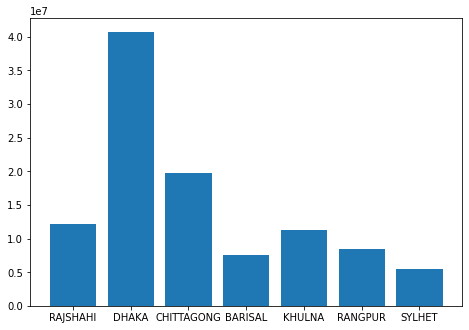

In [52]:
con = PostgresConnection().getConnection()

cur = con.cursor()
select_stmt = "SELECT s.division, SUM(t.total_price) " \
"FROM star_schema.fact_table t  " \
"JOIN star_schema.store_dim s on s.store_key = t.store_key " \
"JOIN star_schema.time_dim tim on tim.time_key = t.time_key " \
"GROUP BY CUBE(s.division) "
cur.execute(select_stmt)
records = cur.fetchall()

df = pd.DataFrame(list(records), columns = ['Division', 'Sales'])
df = df.dropna()
X = df.iloc[:, -2].values
Y = df.iloc[:, 1].values
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X,Y)
plt.show()

In [49]:
X

array([2021., 2020., 2015., 2014., 2017., 2019., 2016., 2018.])

In [50]:
Y

array([Decimal('883772.25'), Decimal('15037190.25'),
       Decimal('15095720.25'), Decimal('14334731.25'),
       Decimal('15015806.00'), Decimal('14949510.25'),
       Decimal('14976508.25'), Decimal('15108197.25')], dtype=object)

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 0)


# regressor = LinearRegression()
# regressor.fit(X_train, Y_train)

# y_pred = regressor.predict(X_test)
# y_pred

In [ ]:
con = PostgresConnection().getConnection()

cur = con.cursor()
select_stmt = "SELECT tim.month,t.total_price, SUM(t.total_price) " \
"FROM star_schema.fact_table t  " \
"JOIN star_schema.store_dim s on s.store_key = t.store_key " \
"JOIN star_schema.time_dim tim on tim.time_key = t.time_key " \
"GROUP BY tim.month, t.total_price "\
"ORDER BY tim.month "
cur.execute(select_stmt)
records = cur.fetchall()
records

# df = pd.DataFrame(list(records), columns = ['Division','TotalPrice', 'Sales'])
# df = df.dropna()
# X = df.iloc[:, -2].values
# Y = df.iloc[:, 1].values
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# ax.bar(X,Y)
# plt.show()